# WorkTerm Report graphs

Seaborn

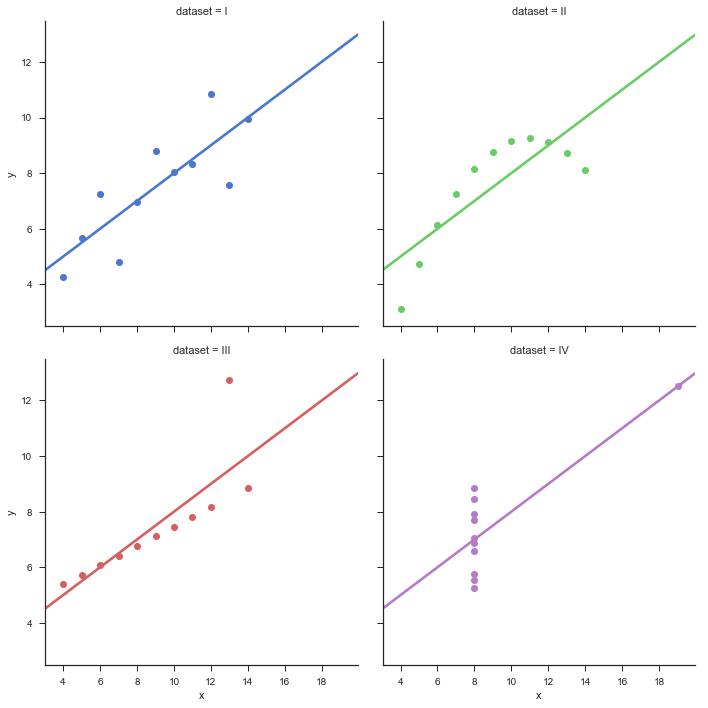

In [3]:
"""
Anscombe's quartet
==================
"""
# This code is mainly written by Michael Waskom. I just added comments for comprehension

# Import the Seaborn library
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted",
           scatter_kws={"s": 50, "alpha": 1})

# citation: (Waskom M., 2018)

Bokeh

In [4]:
# This code is primarily written by Bokeh. I just added comments for comprehension
# Import Bokeh library and features
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

# Import and manipulating Anscombe's quartet dataset
raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

# Creating the space for the graphs
x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

# Create a function for changing the appearance of the 4 graphs dislayed and the different columns
def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title

    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

# Positioning the graphs so they are grid-like and removing the Bokeh toolbar
grid = gridplot([[I, II], [III, IV]], toolbar_location=None)

doc = Document()
doc.add_root(grid)

# Displaying the result in a different tab as .html
if __name__ == "__main__":
    doc.validate()
    filename = "anscombe.html"
    with open(filename, "w") as f:
        f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
    print("Wrote %s" % filename)
    view(filename)
    
# citation: (Anaconda, 2015)

Wrote anscombe.html
